In [1]:
from fun_clean import cleaning, cleaning_sub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('airbnb_data.csv')
sub = pd.read_csv('airbnb_submission.csv')

In [3]:
data = cleaning(data)

In [4]:
data

,room_type,accommodates,bathrooms,host_response_rate,latitude,longitude,number_of_reviews,review_scores_rating,zipcode,bedrooms,...,Chicago,DC,LA,NYC,SF,delta_first,delta_last,delta_host,verified,instant
2,1.000000,2,1.0,1.00,34.046737,-118.260439,9,93.0,90015,1.0,...,0,0,1,0,0,2.969574,2.649239,6.550757,1,0
5,0.413769,2,2.0,1.00,42.339194,-71.049672,12,88.0,2127,1.0,...,0,0,0,0,0,3.388474,2.824465,5.359767,1,0
12,0.413769,2,1.0,1.00,42.330628,-71.053148,40,96.0,2127,1.0,...,0,0,0,0,0,3.711547,2.216650,6.471357,1,1
15,1.000000,2,1.0,1.00,40.734115,-73.997873,31,94.0,10011,1.0,...,0,0,0,1,0,3.952483,2.197485,6.761576,1,0
16,1.000000,4,1.0,1.00,34.001815,-118.451907,3,93.0,90291,2.0,...,0,0,1,0,0,3.385736,3.155752,3.497990,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28855,0.413769,1,1.0,0.78,40.705762,-73.933351,4,100.0,11206,1.0,...,0,0,0,1,0,2.920292,2.293311,5.315961,0,0
28858,0.413769,2,1.0,1.00,34.234394,-118.507997,6,100.0,91325,1.0,...,0,0,1,0,0,2.810776,2.668405,3.574652,0,0
28868,1.000000,4,1.0,1.00,34.048172,-118.262090,5,100.0,90017,0.0,...,0,0,1,0,0,2.925768,2.619122,6.435765,1,1
28869,0.413769,2,1.0,1.00,40.675181,-73.780458,16,100.0,11434,1.0,...,0,0,0,1,0,3.177655,2.192009,3.925104,1,0


In [5]:
mx_result = pd.DataFrame(columns = ['sme','rsme']).T

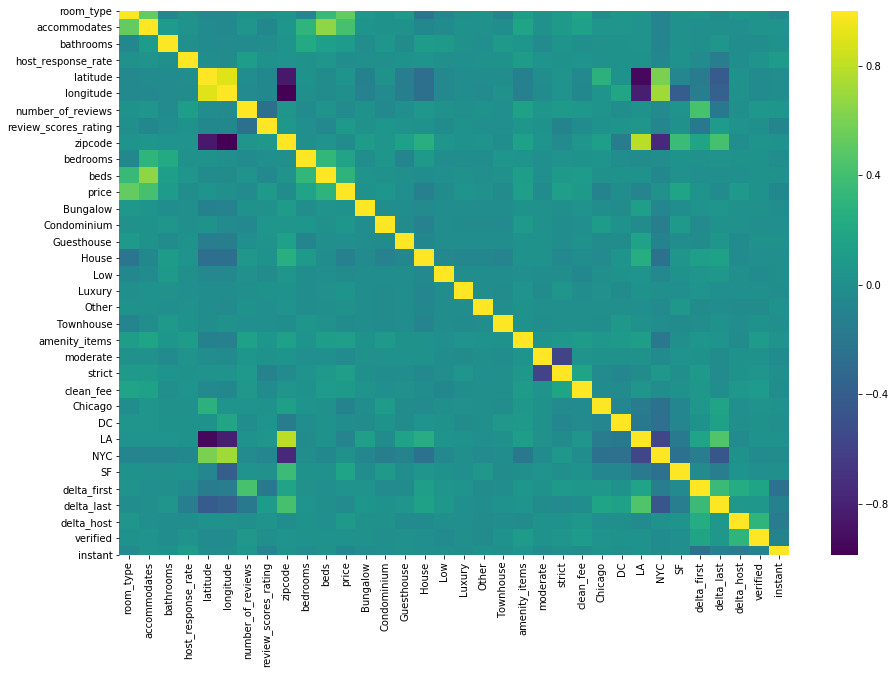

In [6]:
datacorr = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(datacorr, cmap = 'viridis');

## Regresión Lineal - Elastic Net

Usando 33 columnas

In [7]:
X = data.drop('price',axis = 1)
y = data.price

In [8]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [10]:
elastic = ElasticNet().fit(X_train,y_train)
y_pred_elastic = elastic.predict(X_test)

In [11]:
#mx_result['elastic_33'] = [mse(y_test, y_pred_elastic),mse(y_test,y_pred_elastic)**0.5]

Usando 5 columnas con alta correlación a price

In [12]:
X_pcorr = data[['room_type','accommodates','bathrooms','bedrooms','beds']]

In [13]:
X_train_pcorr, X_test_pcorr = train_test_split(X_pcorr, test_size = 0.2)

In [14]:
elastic_pcorr = ElasticNet().fit(X_train_pcorr,y_train)
y_pred_elastic_pcorr = elastic_pcorr.predict(X_test_pcorr)

In [15]:
mx_result['elastic_5_pcorr'] = [mse(y_test, y_pred_elastic_pcorr),mse(y_test,y_pred_elastic_pcorr)**0.5]

Usando 11 columnas

In [16]:
X_feat = data[['room_type','bathrooms','bedrooms','number_of_reviews','review_scores_rating','Chicago','DC','LA','NYC','SF','delta_host']]

In [17]:
X_train_feat, X_test_feat = train_test_split(X_feat, test_size = 0.2)

In [18]:
elastic_feat = ElasticNet().fit(X_train_feat,y_train)
y_pred_elastic_feat = elastic_feat.predict(X_test_feat)

In [19]:
mx_result['elastic_11_feat'] = [mse(y_test, y_pred_elastic_feat),mse(y_test,y_pred_elastic_feat)**0.5]

7 columnas

In [20]:
X_num = data[['accommodates','bathrooms','latitude','number_of_reviews','review_scores_rating','bedrooms','beds']]

In [21]:
X_train_num, X_test_num = train_test_split(X_num, test_size = 0.2)

In [22]:
elastic_num = ElasticNet().fit(X_train_num,y_train)
y_pred_elastic_num = elastic_num.predict(X_test_num)

In [23]:
mx_result['elastic_7_num'] = [mse(y_test, y_pred_elastic_num),mse(y_test,y_pred_elastic_num)**0.5]

12 columnas

In [24]:
X_ubi = data[['delta_host','bathrooms','beds','Bungalow','Condominium','Guesthouse','House','Low','Luxury','Other','Townhouse','review_scores_rating']]

In [25]:
X_train_ubi, X_test_ubi = train_test_split(X_ubi, test_size = 0.2)

In [26]:
elastic_ubi = ElasticNet().fit(X_train_ubi,y_train)
y_pred_elastic_ubi = elastic_ubi.predict(X_test_ubi)

In [27]:
mx_result['elastic_12_ubi'] = [mse(y_test, y_pred_elastic_ubi),mse(y_test,y_pred_elastic_ubi)**0.5]

## SVR

33 columnas

In [28]:
import warnings
warnings.simplefilter('ignore')

from sklearn.svm import SVR

In [29]:
svr = SVR().fit(X_train,y_train)
y_pred_svr = svr.predict(X_test)

In [30]:
#mx_result['svr_33'] = [mse(y_test, y_pred_svr),mse(y_test,y_pred_svr)**0.5]

5 columnas

In [31]:
svr_pcorr = SVR().fit(X_train_pcorr,y_train)
y_pred_svr_pcorr = svr_pcorr.predict(X_test_pcorr)

In [32]:
mx_result['svr_5_pcorr'] = [mse(y_test, y_pred_svr_pcorr),mse(y_test,y_pred_svr_pcorr)**0.5]

11 columnas

In [33]:
svr_feat = SVR().fit(X_train_feat,y_train)
y_pred_svr_feat = svr_feat.predict(X_test_feat)

In [34]:
mx_result['svr_11_feat'] = [mse(y_test, y_pred_svr_feat),mse(y_test,y_pred_svr_feat)**0.5]

7 columnas

In [35]:
svr_num = SVR().fit(X_train_num,y_train)
y_pred_svr_num = svr_num.predict(X_test_num)

In [36]:
mx_result['svr_7_num'] = [mse(y_test, y_pred_svr_num),mse(y_test,y_pred_svr_num)**0.5]

12 columnas

In [37]:
svr_ubi = SVR().fit(X_train_ubi,y_train)
y_pred_svr_ubi = svr_ubi.predict(X_test_ubi)

In [38]:
mx_result['svr_12_ubi'] = [mse(y_test, y_pred_svr_ubi),mse(y_test,y_pred_svr_ubi)**0.5]

## Random Forest Regression

33 columnas

In [39]:
from sklearn.ensemble import RandomForestRegressor as RFR

In [40]:
rfr = RFR().fit(X_train,y_train)
y_pred_rfr = rfr.predict(X_test)

In [41]:
#mx_result['rfr_33'] = [mse(y_test, y_pred_rfr),mse(y_test,y_pred_rfr)**0.5]

5 columnas

In [42]:
rfr_pcorr = RFR().fit(X_train_pcorr,y_train)
y_pred_rfr_pcorr = rfr_pcorr.predict(X_test_pcorr)

In [43]:
mx_result['rfr_5_pcorr'] = [mse(y_test, y_pred_rfr_pcorr),mse(y_test,y_pred_rfr_pcorr)**0.5]

11 columnas

In [44]:
rfr_feat = RFR().fit(X_train_feat,y_train)
y_pred_rfr_feat = rfr_feat.predict(X_test_feat)

In [45]:
mx_result['rfr_11_feat'] = [mse(y_test, y_pred_rfr_feat),mse(y_test,y_pred_rfr_feat)**0.5]

7 columnas

In [46]:
rfr_num = RFR().fit(X_train_num,y_train)
y_pred_rfr_num = rfr_num.predict(X_test_num)

In [47]:
mx_result['rfr_7_num'] = [mse(y_test, y_pred_rfr_num),mse(y_test,y_pred_rfr_num)**0.5]

12 columnas

In [48]:
rfr_ubi = RFR().fit(X_train_ubi,y_train)
y_pred_rfr_ubi = rfr_ubi.predict(X_test_ubi)

In [49]:
mx_result['rfr_12_ubi'] = [mse(y_test, y_pred_rfr_ubi),mse(y_test,y_pred_rfr_ubi)**0.5]

## KNN

33 columnas

In [50]:
from sklearn.neighbors import KNeighborsRegressor as KNNR

In [51]:
knnr = KNNR().fit(X_train,y_train)
y_pred_knnr = knnr.predict(X_test)

In [52]:
#mx_result['knnr_33'] = [mse(y_test, y_pred_knnr),mse(y_test,y_pred_knnr)**0.5]

5 columnas

In [53]:
knnr_pcorr = KNNR().fit(X_train_pcorr,y_train)
y_pred_knnr_pcorr = knnr_pcorr.predict(X_test_pcorr)

In [54]:
mx_result['knnr_5_pcorr'] = [mse(y_test, y_pred_knnr_pcorr),mse(y_test,y_pred_knnr_pcorr)**0.5]

11 columnas

In [55]:
knnr_feat = KNNR().fit(X_train_feat,y_train)
y_pred_knnr_feat = knnr_feat.predict(X_test_feat)

In [56]:
mx_result['knnr_11_feat'] = [mse(y_test, y_pred_knnr_feat),mse(y_test,y_pred_knnr_feat)**0.5]

7 columnas

In [57]:
knnr_num = KNNR().fit(X_train_num,y_train)
y_pred_knnr_num = knnr_num.predict(X_test_num)

In [58]:
mx_result['knnr_7_num'] = [mse(y_test, y_pred_knnr_num),mse(y_test,y_pred_knnr_num)**0.5]

12 columnas

In [59]:
knnr_ubi = KNNR().fit(X_train_ubi,y_train)
y_pred_knnr_ubi = knnr_ubi.predict(X_test_ubi)

In [60]:
mx_result['knnr_12_ubi'] = [mse(y_test, y_pred_knnr_ubi),mse(y_test,y_pred_knnr_ubi)**0.5]

## Grad Boost Regressor

33 columnas

In [61]:
from sklearn.ensemble import GradientBoostingRegressor as GBR

In [62]:
gbr = GBR().fit(X_train,y_train)
y_pred_gbr = gbr.predict(X_test)

In [63]:
#mx_result['gbr_33'] = [mse(y_test, y_pred_gbr),mse(y_test,y_pred_gbr)**0.5]

5 columnas

In [64]:
gbr_pcorr = GBR().fit(X_train_pcorr,y_train)
y_pred_gbr_pcorr = gbr_pcorr.predict(X_test_pcorr)

In [65]:
mx_result['gbr_5_pcorr'] = [mse(y_test, y_pred_gbr_pcorr),mse(y_test,y_pred_gbr_pcorr)**0.5]

11 columnas

In [66]:
gbr_feat = GBR().fit(X_train_feat,y_train)
y_pred_gbr_feat = gbr_feat.predict(X_test_feat)

In [67]:
mx_result['gbr_11_feat'] = [mse(y_test, y_pred_gbr_feat),mse(y_test,y_pred_gbr_feat)**0.5]

7 columnas

In [68]:
gbr_num = GBR().fit(X_train_num,y_train)
y_pred_gbr_num = gbr_num.predict(X_test_num)

In [69]:
mx_result['gbr_7_num'] = [mse(y_test, y_pred_gbr_num),mse(y_test,y_pred_gbr_num)**0.5]

12 columnas

In [70]:
gbr_ubi = GBR().fit(X_train_ubi,y_train)
y_pred_gbr_ubi = gbr_ubi.predict(X_test_ubi)

In [71]:
mx_result['gbr_12_ubi'] = [mse(y_test, y_pred_gbr_ubi),mse(y_test,y_pred_gbr_ubi)**0.5]

## XGBoost

33 columnas

In [72]:
from xgboost import XGBRegressor as XGBR

In [73]:
xgbr = XGBR().fit(X_train,y_train)
y_pred_xgbr = xgbr.predict(X_test)

[14:45:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [74]:
#mx_result['xgbr_33'] = [mse(y_test, y_pred_xgbr),mse(y_test,y_pred_xgbr)**0.5]

5 columnas

In [75]:
xgbr_pcorr = XGBR().fit(X_train_pcorr,y_train)
y_pred_xgbr_pcorr = xgbr_pcorr.predict(X_test_pcorr)

[14:45:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [76]:
mx_result['xgbr_5_pcorr'] = [mse(y_test, y_pred_xgbr_pcorr),mse(y_test,y_pred_xgbr_pcorr)**0.5]

11 columnas

In [77]:
xgbr_feat = XGBR().fit(X_train_feat,y_train)
y_pred_xgbr_feat = xgbr_feat.predict(X_test_feat)

[14:45:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [78]:
mx_result['xgbr_11_feat'] = [mse(y_test, y_pred_xgbr_feat),mse(y_test,y_pred_xgbr_feat)**0.5]

8 columnas

In [79]:
xgbr_num = XGBR().fit(X_train_num,y_train)
y_pred_xgbr_num = xgbr_num.predict(X_test_num)

[14:45:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [80]:
mx_result['xgbr_8_num'] = [mse(y_test, y_pred_xgbr_num),mse(y_test,y_pred_xgbr_num)**0.5]

12 columnas

In [81]:
xgbr_ubi = XGBR().fit(X_train_ubi,y_train)
y_pred_xgbr_ubi = xgbr_ubi.predict(X_test_ubi)

[14:45:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [82]:
mx_result['xgbr_12_ubi'] = [mse(y_test, y_pred_xgbr_ubi),mse(y_test,y_pred_xgbr_ubi)**0.5]

## SDGRegressor

33 columnas

In [83]:
from sklearn.linear_model import SGDRegressor as SGDR

In [84]:
sgdr = SGDR().fit(X_train,y_train)
y_pred_sgdr = sgdr.predict(X_test)

In [85]:
#mx_result['sgdr_33'] = [mse(y_test, y_pred_sgdr),mse(y_test,y_pred_sgdr)**0.5]

5 columnas

In [86]:
sgdr_pcorr = SGDR().fit(X_train_pcorr,y_train)
y_pred_sgdr_pcorr = sgdr_pcorr.predict(X_test_pcorr)

In [87]:
mx_result['sgdr_5_pcorr'] = [mse(y_test, y_pred_sgdr_pcorr),mse(y_test,y_pred_sgdr_pcorr)**0.5]

11 columnas

In [88]:
sgdr_feat = SGDR().fit(X_train_feat,y_train)
y_pred_sgdr_feat = sgdr_feat.predict(X_test_feat)

In [89]:
mx_result['sgdr_11_feat'] = [mse(y_test, y_pred_sgdr_feat),mse(y_test,y_pred_sgdr_feat)**0.5]

8 columnas

In [90]:
sgdr_num = SGDR().fit(X_train_num,y_train)
y_pred_sgdr_num = sgdr_num.predict(X_test_num)

In [91]:
mx_result['sgdr_8_num'] = [mse(y_test, y_pred_sgdr_num),mse(y_test,y_pred_sgdr_num)**0.5]

12 columnas

In [92]:
sgdr_ubi = SGDR().fit(X_train_ubi,y_train)
y_pred_sgdr_ubi = sgdr_ubi.predict(X_test_ubi)

In [93]:
mx_result['sgdr_12_ubi'] = [mse(y_test, y_pred_sgdr_ubi),mse(y_test,y_pred_sgdr_ubi)**0.5]

## CatBoost

33 columnas

In [94]:
from catboost import CatBoostRegressor as CTR

In [95]:
ctr = CTR().fit(X_train,y_train)
y_pred_ctr = ctr.predict(X_test)

0:	learn: 73.2245978	total: 55.9ms	remaining: 55.8s
1:	learn: 72.2968470	total: 58.9ms	remaining: 29.4s
2:	learn: 71.3906497	total: 61.6ms	remaining: 20.5s
3:	learn: 70.5636170	total: 64.4ms	remaining: 16s
4:	learn: 69.7752866	total: 67.3ms	remaining: 13.4s
5:	learn: 69.0134426	total: 69.7ms	remaining: 11.5s
6:	learn: 68.2555510	total: 72.1ms	remaining: 10.2s
7:	learn: 67.5062084	total: 74.8ms	remaining: 9.28s
8:	learn: 66.7955878	total: 77.4ms	remaining: 8.52s
9:	learn: 66.1491035	total: 79.9ms	remaining: 7.91s
10:	learn: 65.4836508	total: 83ms	remaining: 7.46s
11:	learn: 64.9127687	total: 87.4ms	remaining: 7.2s
12:	learn: 64.3402488	total: 91.1ms	remaining: 6.91s
13:	learn: 63.7393551	total: 94.4ms	remaining: 6.65s
14:	learn: 63.2065970	total: 98ms	remaining: 6.43s
15:	learn: 62.7192241	total: 102ms	remaining: 6.25s
16:	learn: 62.2634763	total: 105ms	remaining: 6.07s
17:	learn: 61.8067191	total: 109ms	remaining: 5.93s
18:	learn: 61.3646428	total: 112ms	remaining: 5.76s
19:	learn: 60.

215:	learn: 46.5585652	total: 617ms	remaining: 2.24s
216:	learn: 46.5265554	total: 621ms	remaining: 2.24s
217:	learn: 46.5051767	total: 623ms	remaining: 2.23s
218:	learn: 46.4923675	total: 624ms	remaining: 2.23s
219:	learn: 46.4819422	total: 627ms	remaining: 2.22s
220:	learn: 46.4666923	total: 628ms	remaining: 2.21s
221:	learn: 46.4534512	total: 630ms	remaining: 2.21s
222:	learn: 46.4400036	total: 631ms	remaining: 2.2s
223:	learn: 46.4304025	total: 636ms	remaining: 2.2s
224:	learn: 46.4177956	total: 640ms	remaining: 2.2s
225:	learn: 46.3855492	total: 644ms	remaining: 2.21s
226:	learn: 46.3649574	total: 648ms	remaining: 2.21s
227:	learn: 46.3422650	total: 652ms	remaining: 2.21s
228:	learn: 46.3153100	total: 655ms	remaining: 2.21s
229:	learn: 46.2986594	total: 660ms	remaining: 2.21s
230:	learn: 46.2795090	total: 663ms	remaining: 2.21s
231:	learn: 46.2469041	total: 667ms	remaining: 2.21s
232:	learn: 46.2230229	total: 668ms	remaining: 2.2s
233:	learn: 46.2025736	total: 670ms	remaining: 2.1

390:	learn: 43.2109280	total: 992ms	remaining: 1.54s
391:	learn: 43.1896584	total: 995ms	remaining: 1.54s
392:	learn: 43.1745324	total: 997ms	remaining: 1.54s
393:	learn: 43.1536851	total: 999ms	remaining: 1.54s
394:	learn: 43.1370605	total: 1s	remaining: 1.54s
395:	learn: 43.1205098	total: 1.01s	remaining: 1.53s
396:	learn: 43.1122216	total: 1.01s	remaining: 1.54s
397:	learn: 43.0916273	total: 1.02s	remaining: 1.54s
398:	learn: 43.0791692	total: 1.02s	remaining: 1.53s
399:	learn: 43.0631184	total: 1.02s	remaining: 1.54s
400:	learn: 43.0503209	total: 1.03s	remaining: 1.53s
401:	learn: 43.0387525	total: 1.03s	remaining: 1.53s
402:	learn: 43.0247051	total: 1.03s	remaining: 1.53s
403:	learn: 43.0113263	total: 1.03s	remaining: 1.53s
404:	learn: 43.0044641	total: 1.04s	remaining: 1.52s
405:	learn: 42.9842658	total: 1.04s	remaining: 1.52s
406:	learn: 42.9593815	total: 1.04s	remaining: 1.52s
407:	learn: 42.9361623	total: 1.04s	remaining: 1.51s
408:	learn: 42.9208254	total: 1.05s	remaining: 1.

559:	learn: 40.6720872	total: 1.36s	remaining: 1.07s
560:	learn: 40.6679163	total: 1.37s	remaining: 1.07s
561:	learn: 40.6568627	total: 1.37s	remaining: 1.07s
562:	learn: 40.6378547	total: 1.37s	remaining: 1.07s
563:	learn: 40.6313351	total: 1.38s	remaining: 1.06s
564:	learn: 40.6246643	total: 1.38s	remaining: 1.06s
565:	learn: 40.6145865	total: 1.39s	remaining: 1.06s
566:	learn: 40.5969326	total: 1.4s	remaining: 1.06s
567:	learn: 40.5887434	total: 1.4s	remaining: 1.07s
568:	learn: 40.5781951	total: 1.4s	remaining: 1.06s
569:	learn: 40.5664696	total: 1.41s	remaining: 1.06s
570:	learn: 40.5507910	total: 1.41s	remaining: 1.06s
571:	learn: 40.5349284	total: 1.42s	remaining: 1.06s
572:	learn: 40.5233554	total: 1.42s	remaining: 1.06s
573:	learn: 40.5136850	total: 1.42s	remaining: 1.06s
574:	learn: 40.5052556	total: 1.43s	remaining: 1.05s
575:	learn: 40.4879111	total: 1.43s	remaining: 1.05s
576:	learn: 40.4757698	total: 1.43s	remaining: 1.05s
577:	learn: 40.4644169	total: 1.44s	remaining: 1.

776:	learn: 38.2154715	total: 1.91s	remaining: 547ms
777:	learn: 38.2107559	total: 1.91s	remaining: 545ms
778:	learn: 38.2013565	total: 1.92s	remaining: 545ms
779:	learn: 38.1912215	total: 1.93s	remaining: 543ms
780:	learn: 38.1839252	total: 1.93s	remaining: 541ms
781:	learn: 38.1626226	total: 1.93s	remaining: 539ms
782:	learn: 38.1489800	total: 1.94s	remaining: 538ms
783:	learn: 38.1436175	total: 1.95s	remaining: 536ms
784:	learn: 38.1341673	total: 1.95s	remaining: 534ms
785:	learn: 38.1275640	total: 1.95s	remaining: 532ms
786:	learn: 38.1085414	total: 1.96s	remaining: 529ms
787:	learn: 38.0962233	total: 1.96s	remaining: 526ms
788:	learn: 38.0814273	total: 1.96s	remaining: 524ms
789:	learn: 38.0763669	total: 1.96s	remaining: 521ms
790:	learn: 38.0691205	total: 1.97s	remaining: 519ms
791:	learn: 38.0583311	total: 1.97s	remaining: 517ms
792:	learn: 38.0506205	total: 1.97s	remaining: 515ms
793:	learn: 38.0451728	total: 1.97s	remaining: 512ms
794:	learn: 38.0345622	total: 1.98s	remaining:

975:	learn: 36.3715593	total: 2.47s	remaining: 60.7ms
976:	learn: 36.3591405	total: 2.48s	remaining: 58.3ms
977:	learn: 36.3458882	total: 2.48s	remaining: 55.9ms
978:	learn: 36.3380233	total: 2.49s	remaining: 53.4ms
979:	learn: 36.3303864	total: 2.49s	remaining: 50.9ms
980:	learn: 36.3191230	total: 2.5s	remaining: 48.4ms
981:	learn: 36.3124231	total: 2.51s	remaining: 45.9ms
982:	learn: 36.3025108	total: 2.51s	remaining: 43.4ms
983:	learn: 36.2915493	total: 2.52s	remaining: 40.9ms
984:	learn: 36.2824454	total: 2.52s	remaining: 38.4ms
985:	learn: 36.2705262	total: 2.53s	remaining: 35.9ms
986:	learn: 36.2606196	total: 2.53s	remaining: 33.4ms
987:	learn: 36.2505995	total: 2.54s	remaining: 30.8ms
988:	learn: 36.2411698	total: 2.54s	remaining: 28.2ms
989:	learn: 36.2343589	total: 2.54s	remaining: 25.7ms
990:	learn: 36.2264076	total: 2.55s	remaining: 23.2ms
991:	learn: 36.2206613	total: 2.56s	remaining: 20.6ms
992:	learn: 36.2074921	total: 2.56s	remaining: 18.1ms
993:	learn: 36.2018742	total:

In [96]:
#mx_result['ctr_33'] = [mse(y_test, y_pred_ctr),mse(y_test,y_pred_ctr)**0.5]

5 columns

In [97]:
ctr_pcorr = CTR().fit(X_train_pcorr,y_train)
y_pred_ctr_pcorr = ctr_pcorr.predict(X_test_pcorr)

0:	learn: 74.1834676	total: 11.8ms	remaining: 11.7s
1:	learn: 74.1796322	total: 26.1ms	remaining: 13s
2:	learn: 74.1765581	total: 31.8ms	remaining: 10.6s
3:	learn: 74.1699560	total: 40.2ms	remaining: 10s
4:	learn: 74.1692448	total: 46.8ms	remaining: 9.31s
5:	learn: 74.1687038	total: 50.5ms	remaining: 8.36s
6:	learn: 74.1642658	total: 56ms	remaining: 7.95s
7:	learn: 74.1632363	total: 61.3ms	remaining: 7.6s
8:	learn: 74.1599188	total: 68.2ms	remaining: 7.51s
9:	learn: 74.1591152	total: 71.6ms	remaining: 7.08s
10:	learn: 74.1560714	total: 76.7ms	remaining: 6.9s
11:	learn: 74.1554103	total: 81.1ms	remaining: 6.67s
12:	learn: 74.1490055	total: 87.4ms	remaining: 6.64s
13:	learn: 74.1483478	total: 90.9ms	remaining: 6.41s
14:	learn: 74.1422505	total: 99.5ms	remaining: 6.54s
15:	learn: 74.1356680	total: 104ms	remaining: 6.42s
16:	learn: 74.1351429	total: 107ms	remaining: 6.18s
17:	learn: 74.1343661	total: 113ms	remaining: 6.18s
18:	learn: 74.1285639	total: 117ms	remaining: 6.03s
19:	learn: 74.1

221:	learn: 73.8731160	total: 577ms	remaining: 2.02s
222:	learn: 73.8709544	total: 582ms	remaining: 2.03s
223:	learn: 73.8709531	total: 585ms	remaining: 2.03s
224:	learn: 73.8699313	total: 589ms	remaining: 2.03s
225:	learn: 73.8690654	total: 592ms	remaining: 2.03s
226:	learn: 73.8690391	total: 594ms	remaining: 2.02s
227:	learn: 73.8688731	total: 598ms	remaining: 2.03s
228:	learn: 73.8681633	total: 602ms	remaining: 2.03s
229:	learn: 73.8681633	total: 603ms	remaining: 2.02s
230:	learn: 73.8675160	total: 606ms	remaining: 2.02s
231:	learn: 73.8674589	total: 609ms	remaining: 2.02s
232:	learn: 73.8674589	total: 610ms	remaining: 2.01s
233:	learn: 73.8664840	total: 614ms	remaining: 2.01s
234:	learn: 73.8657134	total: 618ms	remaining: 2.01s
235:	learn: 73.8654817	total: 620ms	remaining: 2.01s
236:	learn: 73.8654326	total: 623ms	remaining: 2s
237:	learn: 73.8645921	total: 629ms	remaining: 2.01s
238:	learn: 73.8645597	total: 632ms	remaining: 2.01s
239:	learn: 73.8644149	total: 636ms	remaining: 2.

407:	learn: 73.7662893	total: 946ms	remaining: 1.37s
408:	learn: 73.7659971	total: 949ms	remaining: 1.37s
409:	learn: 73.7655055	total: 955ms	remaining: 1.37s
410:	learn: 73.7646869	total: 959ms	remaining: 1.37s
411:	learn: 73.7643637	total: 963ms	remaining: 1.37s
412:	learn: 73.7641307	total: 967ms	remaining: 1.37s
413:	learn: 73.7636788	total: 971ms	remaining: 1.37s
414:	learn: 73.7634885	total: 975ms	remaining: 1.37s
415:	learn: 73.7633112	total: 978ms	remaining: 1.37s
416:	learn: 73.7624893	total: 980ms	remaining: 1.37s
417:	learn: 73.7623032	total: 984ms	remaining: 1.37s
418:	learn: 73.7615062	total: 988ms	remaining: 1.37s
419:	learn: 73.7612108	total: 991ms	remaining: 1.37s
420:	learn: 73.7605149	total: 994ms	remaining: 1.37s
421:	learn: 73.7603107	total: 996ms	remaining: 1.36s
422:	learn: 73.7593143	total: 998ms	remaining: 1.36s
423:	learn: 73.7583492	total: 1000ms	remaining: 1.36s
424:	learn: 73.7575820	total: 1s	remaining: 1.36s
425:	learn: 73.7568540	total: 1s	remaining: 1.35

602:	learn: 73.6864253	total: 1.33s	remaining: 874ms
603:	learn: 73.6862678	total: 1.33s	remaining: 876ms
604:	learn: 73.6861514	total: 1.34s	remaining: 878ms
605:	learn: 73.6858923	total: 1.35s	remaining: 879ms
606:	learn: 73.6856190	total: 1.35s	remaining: 877ms
607:	learn: 73.6855038	total: 1.36s	remaining: 876ms
608:	learn: 73.6851592	total: 1.36s	remaining: 875ms
609:	learn: 73.6846223	total: 1.37s	remaining: 874ms
610:	learn: 73.6841887	total: 1.37s	remaining: 873ms
611:	learn: 73.6838601	total: 1.38s	remaining: 872ms
612:	learn: 73.6836912	total: 1.38s	remaining: 872ms
613:	learn: 73.6835695	total: 1.38s	remaining: 870ms
614:	learn: 73.6831925	total: 1.38s	remaining: 867ms
615:	learn: 73.6827188	total: 1.39s	remaining: 864ms
616:	learn: 73.6825517	total: 1.39s	remaining: 861ms
617:	learn: 73.6821992	total: 1.39s	remaining: 859ms
618:	learn: 73.6819383	total: 1.39s	remaining: 858ms
619:	learn: 73.6816416	total: 1.39s	remaining: 855ms
620:	learn: 73.6811016	total: 1.4s	remaining: 

841:	learn: 73.6402360	total: 1.69s	remaining: 318ms
842:	learn: 73.6401559	total: 1.7s	remaining: 316ms
843:	learn: 73.6397166	total: 1.7s	remaining: 314ms
844:	learn: 73.6397098	total: 1.7s	remaining: 312ms
845:	learn: 73.6396626	total: 1.71s	remaining: 311ms
846:	learn: 73.6394765	total: 1.71s	remaining: 309ms
847:	learn: 73.6394400	total: 1.71s	remaining: 307ms
848:	learn: 73.6393343	total: 1.72s	remaining: 305ms
849:	learn: 73.6392155	total: 1.72s	remaining: 303ms
850:	learn: 73.6391680	total: 1.72s	remaining: 302ms
851:	learn: 73.6391132	total: 1.73s	remaining: 300ms
852:	learn: 73.6387335	total: 1.73s	remaining: 298ms
853:	learn: 73.6385582	total: 1.73s	remaining: 296ms
854:	learn: 73.6383716	total: 1.73s	remaining: 294ms
855:	learn: 73.6381364	total: 1.73s	remaining: 291ms
856:	learn: 73.6380771	total: 1.73s	remaining: 289ms
857:	learn: 73.6377096	total: 1.73s	remaining: 287ms
858:	learn: 73.6376350	total: 1.74s	remaining: 285ms
859:	learn: 73.6374392	total: 1.74s	remaining: 28

In [98]:
mx_result['ctr_5_pcorr'] = [mse(y_test, y_pred_ctr_pcorr),mse(y_test,y_pred_ctr_pcorr)**0.5]

11 columnas

In [99]:
ctr_feat = CTR().fit(X_train_feat,y_train)
y_pred_ctr_feat = ctr_feat.predict(X_test_feat)

0:	learn: 74.1781407	total: 9.32ms	remaining: 9.31s
1:	learn: 74.1630185	total: 14.7ms	remaining: 7.33s
2:	learn: 74.1489475	total: 21.5ms	remaining: 7.15s
3:	learn: 74.1327986	total: 26.7ms	remaining: 6.66s
4:	learn: 74.1231559	total: 32.5ms	remaining: 6.47s
5:	learn: 74.1085952	total: 36.6ms	remaining: 6.06s
6:	learn: 74.0935872	total: 40.5ms	remaining: 5.74s
7:	learn: 74.0761840	total: 44.1ms	remaining: 5.47s
8:	learn: 74.0657935	total: 48.1ms	remaining: 5.3s
9:	learn: 74.0585666	total: 51.7ms	remaining: 5.11s
10:	learn: 74.0429910	total: 54.9ms	remaining: 4.94s
11:	learn: 74.0270264	total: 59.2ms	remaining: 4.88s
12:	learn: 74.0134671	total: 62.9ms	remaining: 4.77s
13:	learn: 74.0051044	total: 67.2ms	remaining: 4.73s
14:	learn: 73.9941389	total: 71ms	remaining: 4.66s
15:	learn: 73.9788081	total: 73.8ms	remaining: 4.54s
16:	learn: 73.9665372	total: 76.7ms	remaining: 4.44s
17:	learn: 73.9569078	total: 79.9ms	remaining: 4.36s
18:	learn: 73.9447319	total: 82.8ms	remaining: 4.28s
19:	le

159:	learn: 72.7980362	total: 885ms	remaining: 4.65s
160:	learn: 72.7938700	total: 890ms	remaining: 4.63s
161:	learn: 72.7854775	total: 894ms	remaining: 4.63s
162:	learn: 72.7822162	total: 899ms	remaining: 4.62s
163:	learn: 72.7746834	total: 902ms	remaining: 4.6s
164:	learn: 72.7693438	total: 906ms	remaining: 4.58s
165:	learn: 72.7678865	total: 909ms	remaining: 4.57s
166:	learn: 72.7637482	total: 912ms	remaining: 4.55s
167:	learn: 72.7636232	total: 915ms	remaining: 4.53s
168:	learn: 72.7631608	total: 916ms	remaining: 4.51s
169:	learn: 72.7551698	total: 918ms	remaining: 4.48s
170:	learn: 72.7486786	total: 920ms	remaining: 4.46s
171:	learn: 72.7370477	total: 921ms	remaining: 4.43s
172:	learn: 72.7317807	total: 923ms	remaining: 4.41s
173:	learn: 72.7248070	total: 924ms	remaining: 4.39s
174:	learn: 72.7195427	total: 927ms	remaining: 4.37s
175:	learn: 72.7148073	total: 929ms	remaining: 4.35s
176:	learn: 72.7059287	total: 931ms	remaining: 4.33s
177:	learn: 72.6948430	total: 933ms	remaining: 

317:	learn: 71.8065411	total: 1.26s	remaining: 2.7s
318:	learn: 71.8019978	total: 1.26s	remaining: 2.7s
319:	learn: 71.7972427	total: 1.27s	remaining: 2.7s
320:	learn: 71.7883509	total: 1.27s	remaining: 2.69s
321:	learn: 71.7810404	total: 1.28s	remaining: 2.69s
322:	learn: 71.7710491	total: 1.28s	remaining: 2.69s
323:	learn: 71.7601234	total: 1.28s	remaining: 2.68s
324:	learn: 71.7600277	total: 1.29s	remaining: 2.67s
325:	learn: 71.7540890	total: 1.3s	remaining: 2.68s
326:	learn: 71.7465423	total: 1.3s	remaining: 2.68s
327:	learn: 71.7341982	total: 1.3s	remaining: 2.67s
328:	learn: 71.7292013	total: 1.31s	remaining: 2.67s
329:	learn: 71.7215954	total: 1.31s	remaining: 2.66s
330:	learn: 71.7130027	total: 1.31s	remaining: 2.65s
331:	learn: 71.7029583	total: 1.31s	remaining: 2.64s
332:	learn: 71.6898794	total: 1.31s	remaining: 2.63s
333:	learn: 71.6830419	total: 1.32s	remaining: 2.63s
334:	learn: 71.6818428	total: 1.32s	remaining: 2.62s
335:	learn: 71.6776031	total: 1.32s	remaining: 2.61s

508:	learn: 70.3260285	total: 1.73s	remaining: 1.67s
509:	learn: 70.3186950	total: 1.73s	remaining: 1.67s
510:	learn: 70.3141398	total: 1.74s	remaining: 1.67s
511:	learn: 70.3099643	total: 1.75s	remaining: 1.66s
512:	learn: 70.3048629	total: 1.75s	remaining: 1.66s
513:	learn: 70.2966613	total: 1.75s	remaining: 1.66s
514:	learn: 70.2892488	total: 1.76s	remaining: 1.65s
515:	learn: 70.2789290	total: 1.76s	remaining: 1.65s
516:	learn: 70.2727493	total: 1.76s	remaining: 1.65s
517:	learn: 70.2633714	total: 1.77s	remaining: 1.64s
518:	learn: 70.2549855	total: 1.77s	remaining: 1.64s
519:	learn: 70.2452510	total: 1.77s	remaining: 1.63s
520:	learn: 70.2395932	total: 1.77s	remaining: 1.63s
521:	learn: 70.2313082	total: 1.77s	remaining: 1.62s
522:	learn: 70.2262374	total: 1.78s	remaining: 1.62s
523:	learn: 70.2184088	total: 1.78s	remaining: 1.61s
524:	learn: 70.2134172	total: 1.78s	remaining: 1.61s
525:	learn: 70.2064331	total: 1.78s	remaining: 1.6s
526:	learn: 70.1988346	total: 1.78s	remaining: 

697:	learn: 69.0866950	total: 2.19s	remaining: 948ms
698:	learn: 69.0817061	total: 2.2s	remaining: 946ms
699:	learn: 69.0758191	total: 2.2s	remaining: 944ms
700:	learn: 69.0699179	total: 2.21s	remaining: 941ms
701:	learn: 69.0628157	total: 2.21s	remaining: 938ms
702:	learn: 69.0590863	total: 2.21s	remaining: 935ms
703:	learn: 69.0511925	total: 2.21s	remaining: 932ms
704:	learn: 69.0466342	total: 2.22s	remaining: 929ms
705:	learn: 69.0361927	total: 2.22s	remaining: 925ms
706:	learn: 69.0321843	total: 2.22s	remaining: 921ms
707:	learn: 69.0258704	total: 2.22s	remaining: 918ms
708:	learn: 69.0147248	total: 2.23s	remaining: 914ms
709:	learn: 69.0063819	total: 2.23s	remaining: 910ms
710:	learn: 69.0040654	total: 2.23s	remaining: 906ms
711:	learn: 68.9995573	total: 2.23s	remaining: 903ms
712:	learn: 68.9914630	total: 2.23s	remaining: 899ms
713:	learn: 68.9860693	total: 2.24s	remaining: 896ms
714:	learn: 68.9829791	total: 2.24s	remaining: 892ms
715:	learn: 68.9736508	total: 2.24s	remaining: 8

862:	learn: 68.0477833	total: 2.56s	remaining: 407ms
863:	learn: 68.0468068	total: 2.57s	remaining: 404ms
864:	learn: 68.0392366	total: 2.57s	remaining: 402ms
865:	learn: 68.0340563	total: 2.58s	remaining: 399ms
866:	learn: 68.0290574	total: 2.58s	remaining: 396ms
867:	learn: 68.0220985	total: 2.59s	remaining: 393ms
868:	learn: 68.0171440	total: 2.59s	remaining: 391ms
869:	learn: 68.0137526	total: 2.59s	remaining: 388ms
870:	learn: 68.0053272	total: 2.6s	remaining: 384ms
871:	learn: 68.0026385	total: 2.6s	remaining: 381ms
872:	learn: 67.9977685	total: 2.6s	remaining: 378ms
873:	learn: 67.9968569	total: 2.6s	remaining: 375ms
874:	learn: 67.9902096	total: 2.6s	remaining: 372ms
875:	learn: 67.9851759	total: 2.6s	remaining: 369ms
876:	learn: 67.9826723	total: 2.6s	remaining: 365ms
877:	learn: 67.9803572	total: 2.61s	remaining: 362ms
878:	learn: 67.9727690	total: 2.61s	remaining: 359ms
879:	learn: 67.9668400	total: 2.61s	remaining: 356ms
880:	learn: 67.9576618	total: 2.61s	remaining: 353ms


In [100]:
mx_result['ctr_11_feat'] = [mse(y_test, y_pred_ctr_feat),mse(y_test,y_pred_ctr_feat)**0.5]

8 columnas

In [101]:
ctr_num = CTR().fit(X_train_num,y_train)
y_pred_ctr_num = ctr_num.predict(X_test_num)

0:	learn: 74.1799261	total: 8.41ms	remaining: 8.4s
1:	learn: 74.1747349	total: 13ms	remaining: 6.5s
2:	learn: 74.1626272	total: 17.1ms	remaining: 5.69s
3:	learn: 74.1580048	total: 20ms	remaining: 4.98s
4:	learn: 74.1473319	total: 24.2ms	remaining: 4.82s
5:	learn: 74.1282620	total: 27.8ms	remaining: 4.6s
6:	learn: 74.1198876	total: 29.2ms	remaining: 4.15s
7:	learn: 74.1089656	total: 31.2ms	remaining: 3.87s
8:	learn: 74.0998322	total: 32.6ms	remaining: 3.58s
9:	learn: 74.0913105	total: 33.9ms	remaining: 3.36s
10:	learn: 74.0839979	total: 35.4ms	remaining: 3.19s
11:	learn: 74.0724557	total: 36.8ms	remaining: 3.03s
12:	learn: 74.0601893	total: 38.3ms	remaining: 2.91s
13:	learn: 74.0513986	total: 40ms	remaining: 2.82s
14:	learn: 74.0408708	total: 41.8ms	remaining: 2.75s
15:	learn: 74.0317087	total: 43.9ms	remaining: 2.7s
16:	learn: 74.0258009	total: 45.2ms	remaining: 2.61s
17:	learn: 74.0141971	total: 46.7ms	remaining: 2.55s
18:	learn: 74.0024290	total: 48.4ms	remaining: 2.5s
19:	learn: 73.

189:	learn: 72.7998192	total: 579ms	remaining: 2.47s
190:	learn: 72.7954900	total: 583ms	remaining: 2.47s
191:	learn: 72.7853486	total: 587ms	remaining: 2.47s
192:	learn: 72.7757080	total: 591ms	remaining: 2.47s
193:	learn: 72.7601092	total: 596ms	remaining: 2.48s
194:	learn: 72.7532666	total: 600ms	remaining: 2.48s
195:	learn: 72.7510060	total: 603ms	remaining: 2.47s
196:	learn: 72.7470316	total: 605ms	remaining: 2.47s
197:	learn: 72.7427595	total: 610ms	remaining: 2.47s
198:	learn: 72.7312758	total: 613ms	remaining: 2.46s
199:	learn: 72.7269048	total: 616ms	remaining: 2.46s
200:	learn: 72.7196569	total: 618ms	remaining: 2.46s
201:	learn: 72.7144331	total: 620ms	remaining: 2.45s
202:	learn: 72.7106574	total: 621ms	remaining: 2.44s
203:	learn: 72.7023449	total: 623ms	remaining: 2.43s
204:	learn: 72.6958812	total: 625ms	remaining: 2.42s
205:	learn: 72.6911304	total: 627ms	remaining: 2.42s
206:	learn: 72.6881138	total: 628ms	remaining: 2.41s
207:	learn: 72.6792291	total: 630ms	remaining:

360:	learn: 71.8196899	total: 952ms	remaining: 1.69s
361:	learn: 71.8155555	total: 958ms	remaining: 1.69s
362:	learn: 71.8129617	total: 962ms	remaining: 1.69s
363:	learn: 71.8059562	total: 970ms	remaining: 1.7s
364:	learn: 71.8003185	total: 975ms	remaining: 1.7s
365:	learn: 71.7972701	total: 981ms	remaining: 1.7s
366:	learn: 71.7920351	total: 986ms	remaining: 1.7s
367:	learn: 71.7901385	total: 989ms	remaining: 1.7s
368:	learn: 71.7852184	total: 993ms	remaining: 1.7s
369:	learn: 71.7759817	total: 995ms	remaining: 1.69s
370:	learn: 71.7689809	total: 997ms	remaining: 1.69s
371:	learn: 71.7620273	total: 999ms	remaining: 1.69s
372:	learn: 71.7565322	total: 1s	remaining: 1.68s
373:	learn: 71.7505973	total: 1s	remaining: 1.68s
374:	learn: 71.7475227	total: 1s	remaining: 1.67s
375:	learn: 71.7414945	total: 1s	remaining: 1.67s
376:	learn: 71.7355503	total: 1.01s	remaining: 1.66s
377:	learn: 71.7272692	total: 1.01s	remaining: 1.66s
378:	learn: 71.7243161	total: 1.01s	remaining: 1.66s
379:	learn:

533:	learn: 70.7262298	total: 1.33s	remaining: 1.16s
534:	learn: 70.7223104	total: 1.33s	remaining: 1.16s
535:	learn: 70.7140465	total: 1.34s	remaining: 1.16s
536:	learn: 70.7107929	total: 1.34s	remaining: 1.16s
537:	learn: 70.7064418	total: 1.35s	remaining: 1.16s
538:	learn: 70.7003810	total: 1.35s	remaining: 1.15s
539:	learn: 70.6955784	total: 1.35s	remaining: 1.15s
540:	learn: 70.6910877	total: 1.36s	remaining: 1.15s
541:	learn: 70.6827730	total: 1.36s	remaining: 1.15s
542:	learn: 70.6803179	total: 1.36s	remaining: 1.14s
543:	learn: 70.6723361	total: 1.36s	remaining: 1.14s
544:	learn: 70.6684754	total: 1.36s	remaining: 1.14s
545:	learn: 70.6663887	total: 1.36s	remaining: 1.14s
546:	learn: 70.6625152	total: 1.37s	remaining: 1.13s
547:	learn: 70.6544802	total: 1.37s	remaining: 1.13s
548:	learn: 70.6488649	total: 1.37s	remaining: 1.13s
549:	learn: 70.6457529	total: 1.37s	remaining: 1.12s
550:	learn: 70.6358941	total: 1.37s	remaining: 1.12s
551:	learn: 70.6184610	total: 1.38s	remaining:

733:	learn: 69.5901535	total: 1.91s	remaining: 692ms
734:	learn: 69.5859910	total: 1.91s	remaining: 690ms
735:	learn: 69.5769764	total: 1.92s	remaining: 688ms
736:	learn: 69.5714009	total: 1.92s	remaining: 686ms
737:	learn: 69.5624667	total: 1.93s	remaining: 684ms
738:	learn: 69.5600102	total: 1.93s	remaining: 682ms
739:	learn: 69.5570829	total: 1.93s	remaining: 679ms
740:	learn: 69.5526063	total: 1.94s	remaining: 677ms
741:	learn: 69.5440641	total: 1.94s	remaining: 675ms
742:	learn: 69.5356899	total: 1.95s	remaining: 674ms
743:	learn: 69.5290866	total: 1.96s	remaining: 673ms
744:	learn: 69.5205369	total: 1.96s	remaining: 672ms
745:	learn: 69.5134632	total: 1.96s	remaining: 669ms
746:	learn: 69.5065716	total: 1.97s	remaining: 666ms
747:	learn: 69.5024413	total: 1.97s	remaining: 663ms
748:	learn: 69.4942368	total: 1.97s	remaining: 661ms
749:	learn: 69.4897680	total: 1.98s	remaining: 660ms
750:	learn: 69.4826881	total: 1.99s	remaining: 659ms
751:	learn: 69.4790111	total: 1.99s	remaining:

927:	learn: 68.5379157	total: 2.47s	remaining: 192ms
928:	learn: 68.5330855	total: 2.48s	remaining: 189ms
929:	learn: 68.5280741	total: 2.48s	remaining: 187ms
930:	learn: 68.5233125	total: 2.49s	remaining: 184ms
931:	learn: 68.5203118	total: 2.49s	remaining: 182ms
932:	learn: 68.5163993	total: 2.5s	remaining: 179ms
933:	learn: 68.5129491	total: 2.5s	remaining: 177ms
934:	learn: 68.5059993	total: 2.5s	remaining: 174ms
935:	learn: 68.4985645	total: 2.5s	remaining: 171ms
936:	learn: 68.4946077	total: 2.51s	remaining: 169ms
937:	learn: 68.4913843	total: 2.51s	remaining: 166ms
938:	learn: 68.4870718	total: 2.51s	remaining: 163ms
939:	learn: 68.4791746	total: 2.51s	remaining: 160ms
940:	learn: 68.4755102	total: 2.52s	remaining: 158ms
941:	learn: 68.4731990	total: 2.52s	remaining: 155ms
942:	learn: 68.4676237	total: 2.52s	remaining: 152ms
943:	learn: 68.4643716	total: 2.52s	remaining: 150ms
944:	learn: 68.4561487	total: 2.52s	remaining: 147ms
945:	learn: 68.4488560	total: 2.53s	remaining: 144

In [102]:
mx_result['ctr_8_num'] = [mse(y_test, y_pred_ctr_num),mse(y_test,y_pred_ctr_num)**0.5]

12 columnas

In [103]:
ctr_ubi = CTR().fit(X_train_ubi,y_train)
y_pred_ctr_ubi = ctr_ubi.predict(X_test_ubi)

0:	learn: 74.1752050	total: 4.57ms	remaining: 4.56s
1:	learn: 74.1635848	total: 10.2ms	remaining: 5.09s
2:	learn: 74.1506993	total: 14.3ms	remaining: 4.76s
3:	learn: 74.1420723	total: 18ms	remaining: 4.48s
4:	learn: 74.1353143	total: 21.3ms	remaining: 4.24s
5:	learn: 74.1277700	total: 26.7ms	remaining: 4.43s
6:	learn: 74.1166859	total: 28.3ms	remaining: 4.01s
7:	learn: 74.1090735	total: 30.3ms	remaining: 3.75s
8:	learn: 74.1049493	total: 32.3ms	remaining: 3.55s
9:	learn: 74.0974940	total: 33.8ms	remaining: 3.35s
10:	learn: 74.0869238	total: 35.3ms	remaining: 3.17s
11:	learn: 74.0784085	total: 37.4ms	remaining: 3.08s
12:	learn: 74.0654345	total: 40.3ms	remaining: 3.06s
13:	learn: 74.0482648	total: 45ms	remaining: 3.17s
14:	learn: 74.0388004	total: 50.1ms	remaining: 3.29s
15:	learn: 74.0294540	total: 55.2ms	remaining: 3.4s
16:	learn: 74.0204209	total: 60.2ms	remaining: 3.48s
17:	learn: 74.0116385	total: 65.1ms	remaining: 3.55s
18:	learn: 74.0058303	total: 70.1ms	remaining: 3.62s
19:	lear

184:	learn: 73.1286706	total: 573ms	remaining: 2.52s
185:	learn: 73.1256883	total: 579ms	remaining: 2.53s
186:	learn: 73.1205221	total: 585ms	remaining: 2.54s
187:	learn: 73.1081567	total: 590ms	remaining: 2.55s
188:	learn: 73.1039745	total: 594ms	remaining: 2.55s
189:	learn: 73.0986048	total: 598ms	remaining: 2.55s
190:	learn: 73.0958950	total: 602ms	remaining: 2.55s
191:	learn: 73.0878592	total: 605ms	remaining: 2.55s
192:	learn: 73.0781264	total: 610ms	remaining: 2.55s
193:	learn: 73.0763281	total: 615ms	remaining: 2.55s
194:	learn: 73.0710620	total: 620ms	remaining: 2.56s
195:	learn: 73.0675613	total: 623ms	remaining: 2.56s
196:	learn: 73.0650738	total: 626ms	remaining: 2.55s
197:	learn: 73.0623247	total: 629ms	remaining: 2.55s
198:	learn: 73.0569546	total: 632ms	remaining: 2.54s
199:	learn: 73.0565018	total: 635ms	remaining: 2.54s
200:	learn: 73.0481649	total: 637ms	remaining: 2.53s
201:	learn: 73.0419185	total: 638ms	remaining: 2.52s
202:	learn: 73.0382849	total: 640ms	remaining:

354:	learn: 72.4164339	total: 948ms	remaining: 1.72s
355:	learn: 72.4127324	total: 952ms	remaining: 1.72s
356:	learn: 72.4091118	total: 958ms	remaining: 1.72s
357:	learn: 72.4029482	total: 962ms	remaining: 1.73s
358:	learn: 72.3984725	total: 968ms	remaining: 1.73s
359:	learn: 72.3931767	total: 973ms	remaining: 1.73s
360:	learn: 72.3893964	total: 977ms	remaining: 1.73s
361:	learn: 72.3849747	total: 981ms	remaining: 1.73s
362:	learn: 72.3819039	total: 984ms	remaining: 1.73s
363:	learn: 72.3788597	total: 989ms	remaining: 1.73s
364:	learn: 72.3759177	total: 991ms	remaining: 1.72s
365:	learn: 72.3725504	total: 993ms	remaining: 1.72s
366:	learn: 72.3677775	total: 997ms	remaining: 1.72s
367:	learn: 72.3650541	total: 1000ms	remaining: 1.72s
368:	learn: 72.3615888	total: 1s	remaining: 1.72s
369:	learn: 72.3581901	total: 1.01s	remaining: 1.72s
370:	learn: 72.3457160	total: 1.01s	remaining: 1.72s
371:	learn: 72.3419466	total: 1.01s	remaining: 1.71s
372:	learn: 72.3375420	total: 1.02s	remaining: 1

547:	learn: 71.4409716	total: 1.52s	remaining: 1.25s
548:	learn: 71.4359095	total: 1.53s	remaining: 1.25s
549:	learn: 71.4325488	total: 1.53s	remaining: 1.25s
550:	learn: 71.4285841	total: 1.53s	remaining: 1.25s
551:	learn: 71.4254708	total: 1.54s	remaining: 1.25s
552:	learn: 71.4225915	total: 1.54s	remaining: 1.25s
553:	learn: 71.4183126	total: 1.54s	remaining: 1.24s
554:	learn: 71.4085514	total: 1.55s	remaining: 1.24s
555:	learn: 71.3989667	total: 1.55s	remaining: 1.24s
556:	learn: 71.3897354	total: 1.56s	remaining: 1.24s
557:	learn: 71.3830752	total: 1.56s	remaining: 1.24s
558:	learn: 71.3813101	total: 1.57s	remaining: 1.24s
559:	learn: 71.3776591	total: 1.57s	remaining: 1.23s
560:	learn: 71.3750633	total: 1.57s	remaining: 1.23s
561:	learn: 71.3713693	total: 1.58s	remaining: 1.23s
562:	learn: 71.3652086	total: 1.58s	remaining: 1.23s
563:	learn: 71.3594905	total: 1.58s	remaining: 1.23s
564:	learn: 71.3524812	total: 1.59s	remaining: 1.22s
565:	learn: 71.3482980	total: 1.59s	remaining:

705:	learn: 70.7457089	total: 1.9s	remaining: 789ms
706:	learn: 70.7447634	total: 1.9s	remaining: 787ms
707:	learn: 70.7386754	total: 1.9s	remaining: 784ms
708:	learn: 70.7344471	total: 1.9s	remaining: 781ms
709:	learn: 70.7303260	total: 1.91s	remaining: 779ms
710:	learn: 70.7266834	total: 1.91s	remaining: 777ms
711:	learn: 70.7244984	total: 1.92s	remaining: 775ms
712:	learn: 70.7213236	total: 1.92s	remaining: 773ms
713:	learn: 70.7185535	total: 1.92s	remaining: 771ms
714:	learn: 70.7137385	total: 1.93s	remaining: 768ms
715:	learn: 70.7061443	total: 1.93s	remaining: 766ms
716:	learn: 70.7030350	total: 1.94s	remaining: 764ms
717:	learn: 70.6989934	total: 1.94s	remaining: 762ms
718:	learn: 70.6931000	total: 1.94s	remaining: 760ms
719:	learn: 70.6899620	total: 1.95s	remaining: 758ms
720:	learn: 70.6841941	total: 1.95s	remaining: 756ms
721:	learn: 70.6789348	total: 1.96s	remaining: 754ms
722:	learn: 70.6773277	total: 1.96s	remaining: 751ms
723:	learn: 70.6713882	total: 1.96s	remaining: 749

883:	learn: 70.0804386	total: 2.27s	remaining: 297ms
884:	learn: 70.0780278	total: 2.27s	remaining: 295ms
885:	learn: 70.0715472	total: 2.28s	remaining: 293ms
886:	learn: 70.0684484	total: 2.28s	remaining: 291ms
887:	learn: 70.0627731	total: 2.28s	remaining: 288ms
888:	learn: 70.0567620	total: 2.29s	remaining: 286ms
889:	learn: 70.0543573	total: 2.29s	remaining: 283ms
890:	learn: 70.0516682	total: 2.29s	remaining: 281ms
891:	learn: 70.0494301	total: 2.3s	remaining: 278ms
892:	learn: 70.0424432	total: 2.3s	remaining: 276ms
893:	learn: 70.0386595	total: 2.31s	remaining: 273ms
894:	learn: 70.0342030	total: 2.31s	remaining: 271ms
895:	learn: 70.0292597	total: 2.31s	remaining: 269ms
896:	learn: 70.0222284	total: 2.32s	remaining: 266ms
897:	learn: 70.0193691	total: 2.32s	remaining: 264ms
898:	learn: 70.0148395	total: 2.32s	remaining: 261ms
899:	learn: 70.0095093	total: 2.33s	remaining: 258ms
900:	learn: 70.0080253	total: 2.33s	remaining: 256ms
901:	learn: 70.0011648	total: 2.33s	remaining: 2

In [104]:
mx_result['ctr_12_ubi'] = [mse(y_test, y_pred_ctr_ubi),mse(y_test,y_pred_ctr_ubi)**0.5]

## LightGBM

33 columnas

In [105]:
from lightgbm import LGBMRegressor as LGBMR

In [106]:
lgbmr = LGBMR().fit(X_train,y_train)
y_pred_lgbmr = lgbmr.predict(X_test)

In [107]:
#mx_result['lgbmr_33'] = [mse(y_test, y_pred_lgbmr),mse(y_test,y_pred_lgbmr)**0.5]

5 columnas

In [108]:
lgbmr_pcorr = LGBMR().fit(X_train_pcorr,y_train)
y_pred_lgbmr_pcorr = lgbmr_pcorr.predict(X_test_pcorr)

In [109]:
mx_result['lgbmr_5_pcorr'] = [mse(y_test, y_pred_lgbmr_pcorr),mse(y_test,y_pred_lgbmr_pcorr)**0.5]

11 columnas

In [110]:
lgbmr_feat = LGBMR().fit(X_train_feat,y_train)
y_pred_lgbmr_feat = lgbmr_feat.predict(X_test_feat)

In [111]:
mx_result['lgbmr_11_feat'] = [mse(y_test, y_pred_lgbmr_feat),mse(y_test,y_pred_lgbmr_feat)**0.5]

8 columnas

In [112]:
lgbmr_num = LGBMR().fit(X_train_num,y_train)
y_pred_lgbmr_num = lgbmr_num.predict(X_test_num)

In [113]:
mx_result['lgbmr_8_num'] = [mse(y_test, y_pred_lgbmr_num),mse(y_test,y_pred_lgbmr_num)**0.5]

12 columnas

In [114]:
lgbmr_ubi = LGBMR().fit(X_train_ubi,y_train)
y_pred_lgbmr_ubi = lgbmr_ubi.predict(X_test_ubi)

In [115]:
mx_result['lgbmr_12_ubi'] = [mse(y_test, y_pred_lgbmr_ubi),mse(y_test,y_pred_lgbmr_ubi)**0.5]

In [116]:
mx_result.T

,sme,rsme
elastic_5_pcorr,6.727223e+03,8.201965e+01
elastic_11_feat,6.725001e+03,8.200610e+01
elastic_7_num,6.726494e+03,8.201521e+01
elastic_12_ubi,6.727547e+03,8.202162e+01
svr_5_pcorr,7.042238e+03,8.391804e+01
svr_11_feat,7.058187e+03,8.401301e+01
svr_7_num,7.046360e+03,8.394260e+01
svr_12_ubi,7.039613e+03,8.390240e+01
rfr_5_pcorr,6.845043e+03,8.273478e+01
rfr_11_feat,7.892478e+03,8.883962e+01


In [117]:
top10 = mx_result.T.sort_values('rsme', ascending = True).head(10).T

In [118]:
top10

,elastic_11_feat,elastic_7_num,elastic_5_pcorr,elastic_12_ubi,sgdr_5_pcorr,xgbr_5_pcorr,gbr_5_pcorr,gbr_11_feat,xgbr_11_feat,xgbr_12_ubi
sme,6725.000617,6726.494164,6727.222519,6727.546869,6735.207062,6755.590336,6761.065476,6774.036447,6781.167993,6791.75751
rsme,82.006101,82.015207,82.019647,82.021624,82.068307,82.192398,82.225698,82.304535,82.347848,82.41212


In [130]:
top10.to_excel('corrida11feat.xlsx', index=False)

In [120]:
#df_res = pd.DataFrame()
#df_res['elastic_pcorr'] = y_pred_elastic_pcorr
#df_res['xgbr_pcorr'] = y_pred_xgbr_pcorr
#df_res['sgdr_pcorr'] = y_pred_sgdr_pcorr
#df_res['lgbmr_pcorr'] = y_pred_lgbmr_pcorr

In [121]:
#ctr_pcorr_meta = CTR().fit(df_res,y_test)

In [122]:
#from mlxtend.regressor import StackingRegressor

In [123]:
#metamodelo=StackingRegressor(regressors=[elastic_pcorr, xgbr_pcorr, sgdr_pcorr, lgbmr_pcorr], meta_regressor=ctr_pcorr_meta).fit(X_pcorr, y)

In [131]:
sub = pd.read_csv('airbnb_submission.csv')
sub = cleaning_sub(sub)

In [132]:
sub_feat = sub[['room_type','bathrooms','bedrooms','number_of_reviews','review_scores_rating','Chicago','DC','LA','NYC','SF','delta_host']]

In [136]:
xgbr_feat_full = XGBR().fit(X_feat,y)
y_pred_xgbr_feat__full = xgbr_feat_full.predict(sub_feat)

[14:55:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [126]:
#y_pred_metamodelo = metamodelo.predict(sub_pcorr)

In [127]:
#y_pred_metamodelo.shape

In [137]:
subEGHM = pd.DataFrame(range(len(y_pred_xgbr_feat__full)))
subEGHM.columns = ['id']
price = pd.DataFrame(y_pred_xgbr_feat__full, columns = ['price'])
subEGHM = subEGHM.join(price)

In [138]:
subEGHM.to_csv('y_pred_xgbr_feat__full.csv', index = False)